In [ ]:
import numpy as np
import pandas as pd
import math
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from subprocess import check_output
print(check_output(["ls"]).decode("utf8"))

In [2]:
df = pd.read_csv('results.csv', names = ['Gender', 'Evenet', 'Location', 'Year', 'Medal', 'Name', 
                                         'Nationality', 'Result', 'Wind'])

In [3]:
def exponenial_func(x, a, b, c):
    return a*np.exp(-b*x)+c

In [7]:
sprint = df[df.Evenet == '100M Men']

In [8]:
sprint = sprint[sprint.Result != 'None']

In [13]:
df.head()

,Gender,Evenet,Location,Year,Medal,Name,Nationality,Result,Wind
0,Gender,Event,Location,Year,Medal,Name,Nationality,Result,NaN
1,M,10000M Men,Rio,2016,G,Mohamed FARAH,USA,25:05.17,NaN
2,M,10000M Men,Rio,2016,S,Paul Kipngetich TANUI,KEN,27:05.64,NaN
3,M,10000M Men,Rio,2016,B,Tamirat TOLA,ETH,27:06.26,NaN
4,M,10000M Men,Beijing,2008,G,Kenenisa BEKELE,ETH,27:01.17,NaN


In [14]:
sprint = df[df.Evenet == '100M Men']
sprint = sprint[sprint.Result != 'None']
# lambda is an anyonums function 
# apply passes each row of Year as x 
sprint['Year'] = sprint.Year.apply(lambda x: int(x) 
sprint['Result'] = sprint.Result.apply(lambda x: float(x))

plt.figure(figsize = (8,8))
plt.plot(sprint.Year[sprint.Medal == 'G'].values,sprint.Result[sprint.Medal == 'G'].values,'o', color = 'y', markersize = 10, alpha = 0.4)
plt.plot(sprint.Year[sprint.Medal == 'S'].values,sprint.Result[sprint.Medal == 'S'].values,'o', color = 'gray',markersize = 10, alpha = 0.4)
plt.plot(sprint.Year[sprint.Medal == 'B'].values,sprint.Result[sprint.Medal == 'B'].values,'o', color = 'r',markersize = 10, alpha = 0.4)

x = sprint.Year.values - 1896
y = sprint.Result
popt, pcov = curve_fit(exponenial_func, x, y, p0=(12, 1e-6, 1))
yy = exponenial_func(np.unique(x), *popt)
plt.plot(np.unique(sprint.Year.values),yy)
plt.xlabel('Year')
plt.ylabel('Result [sec]')
plt.legend(['Gold','Silver','Bronze'])
plt.title('100M Men')

SyntaxError: invalid syntax (<ipython-input-14-cf1d3c52734b>, line 6)

In [11]:
%matplotlib inline

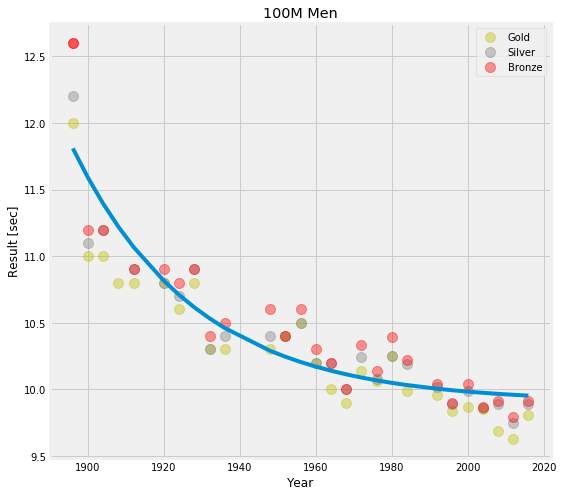

In [12]:
sprint = df[df.Evenet == '100M Men']
sprint = sprint[sprint.Result != 'None']
sprint['Year'] = sprint.Year.apply(lambda x: int(x))
sprint['Result'] = sprint.Result.apply(lambda x: float(x))

plt.figure(figsize = (8,8))
#values only gives the seriesof the varibale only that without 1, 2, index 
#o give that o .. plot item
plt.plot(sprint.Year[sprint.Medal == 'G'].values,sprint.Result[sprint.Medal == 'G'].values,'o', color = 'y', markersize = 10, alpha = 0.4)
plt.plot(sprint.Year[sprint.Medal == 'S'].values,sprint.Result[sprint.Medal == 'S'].values,'o', color = 'gray',markersize = 10, alpha = 0.4)
plt.plot(sprint.Year[sprint.Medal == 'B'].values,sprint.Result[sprint.Medal == 'B'].values,'o', color = 'r',markersize = 10, alpha = 0.4)

x = sprint.Year.values - 1896
y = sprint.Result
popt, pcov = curve_fit(exponenial_func, x, y, p0=(12, 1e-6, 1))
yy = exponenial_func(np.unique(x), *popt)
plt.plot(np.unique(sprint.Year.values),yy)
plt.xlabel('Year')
plt.ylabel('Result [sec]')
plt.legend(['Gold','Silver','Bronze'])
plt.title('100M Men')